# Soft Constraints and Regularization

We will now look at a few uses of slack variables in QPs.  We may sometimes not wish to enforce hard constraints on an optimization problem.  In these cases, we can soften a constraint by puttin a penalty on violating it, and adding this to the cost function.  For example, if our hard constraint is $x \geq b$, we can soften this with a slack variable to have a constraint 
$$x \geq b - s,$$ 
where we constrain $s \geq 0$ and add a term $\beta s^T s$ to the cost function.  Ideally, $s=0$ and the constraint is satisfied, but if it cannot be, the optimizer will try to make $s$ as small as possible.

Another use of slack variables, as we saw last lesson, is to add a $l_p$-norm to the cost function.  This is called <i>regularization</i>.  When we have an existing quadratic cost function, adding a term of the form $\gamma \Vert x \Vert_\infty$, where $\gamma$ is some small weight.

1. Discuss where we may wish to use both soft constraints and regularization in the portfolio optimization problem.  Try to predict the

2. Use the working implementation below to implement your soft constraints / regularization using CVXPY and evaluate the effect.  Produce plots of the portfolio allocation in each case to demonstrate what the extra terms in the cost function do.

3. EXTENSION: We could have used a 1-norm instead for regularization, which is common to add sparsity to the solution.  However, in this case, this would have no effect on the solution.  Why?

In [1]:
import urllib.request as url
import numpy as np
import cvxpy as cvx

# Load portfolio data and extract matrices
file_url = 'https://course-resources.minerva.kgi.edu/uploaded_files/mke/nv1GKr/port5.txt'

with url.urlopen(file_url) as data_file:
    lines = [l.decode().split() for l in data_file.readlines()]

# Get the first line, which is the size of the portfolio:
N = int(lines[0][0])

# Get the next N lines, which give the means and standard deviations
mean = np.array([[float(y[0]) for y in lines[1:N+1]]]).T
stdev = np.array([[float(y[1]) for y in lines[1:N+1]]]).T

# Now get the correlation matrix data
rowind = np.array([int(y[0])-1 for y in lines[N+1:]])
colind = np.array([int(y[1])-1 for y in lines[N+1:]])
corr = np.array([float(y[2]) for y in lines[N+1:]])

# Create the correlation matrix and then the covariance matrix
C = np.zeros([N,N])
C[rowind,colind]=corr
C = C + np.triu(C,1).T #Add in the lower triangle not in the data file

Cov = np.multiply(C,stdev * stdev.T)

In [5]:
# Minimum rate of return
r = 0.002

# create column vector of asset allocations
x = cvx.Variable(N)

# Objective
risk = 0.5*cvx.quad_form(x, Cov) + 0.01*cvx.norm(x, np.inf)
obj = cvx.Minimize(risk)

# Constraints
con = [x >= 0, cvx.sum(x) == 1, mean.T*x >= r]

# Solve the problem
prob = cvx.Problem(obj, con)
min_risk = prob.solve()
print('Minimum Risk: %4e' % min_risk)

Minimum Risk: 6.373419e-04


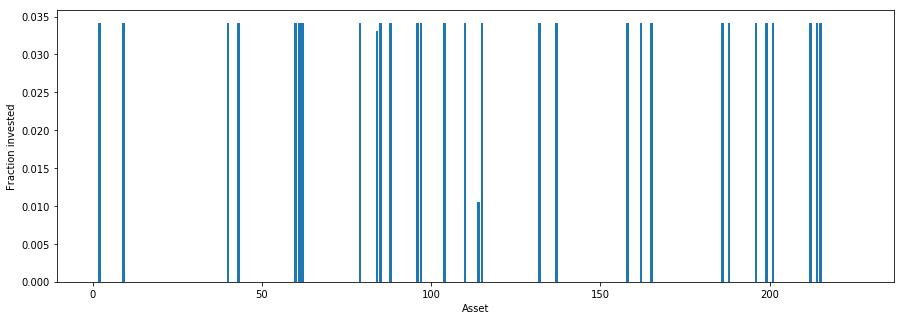

In [8]:
# Plot of asset allocation
import matplotlib.pyplot as plt
allocations = [k.value for k in x]

plt.figure(figsize=(15, 5))
plt.bar(range(1,N+1),allocations)
plt.xlabel('Asset')
plt.ylabel('Fraction invested')
plt.show()